# seattle_weather

This notebook can contain snippets of code as examples or demonstrations, working out how to do different bits of analysis or visualisation.

In [3]:
# pathlib is a standard library module for working with 
# "paths" - file and folder locations
from pathlib import Path

# requests is a library for making web requests - 
# downloading files or webpages, or posting queries
import requests

# set up variables
seattle_weather_url = "https://github.com/vega/vega/raw/main/docs/data/seattle-weather.csv"
download_location = Path("..", "data", "seattle-weather.csv")

# make request
request = requests.get(seattle_weather_url)

# save file
with open(download_location, 'wb') as file_handle:
    file_handle.write(request.content)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import regex as re
import seaborn as sns

In [7]:
# Load the data
df = pd.read_csv(seattle_weather_url)


In [22]:
# Print the first few rows
print(df.head())

            precipitation  temp_max  temp_min  wind  weather
date                                                        
2012-01-01            0.0      12.8       5.0   4.7  drizzle
2012-01-02           10.9      10.6       2.8   4.5     rain
2012-01-03            0.8      11.7       7.2   2.3     rain
2012-01-04           20.3      12.2       5.6   4.7     rain
2012-01-05            1.3       8.9       2.8   6.1     rain


In [41]:
# Reset index
df.reset_index(inplace=True)

# Now 'date' is a column, extract year from it
df['year'] = pd.DatetimeIndex(df['date']).year


C:\Users\jenny\AppData\Local\Temp\ipykernel_29216\1631431909.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  fig = sns.lineplot(x='year', y='wind', hue='weather',


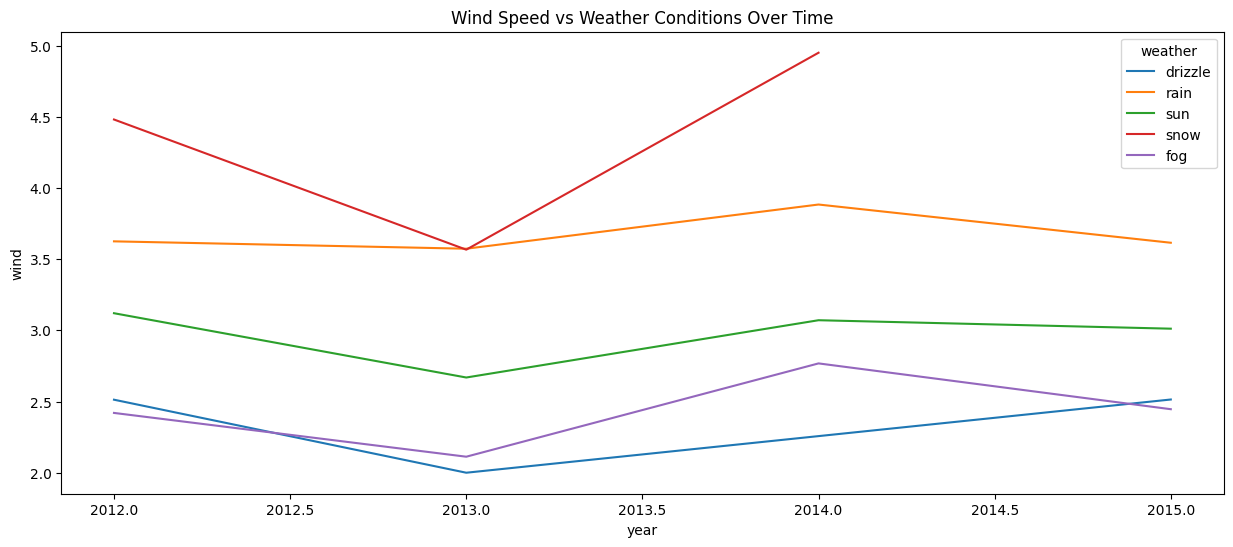

In [44]:
# plot
plt.figure(figsize=(15, 6))
fig = sns.lineplot(x='year', y='wind', hue='weather', 
                   data=df, ci=None)
ax = plt.gca()
ax.set_title("Wind Speed vs Weather Conditions Over Time")
plt.show()


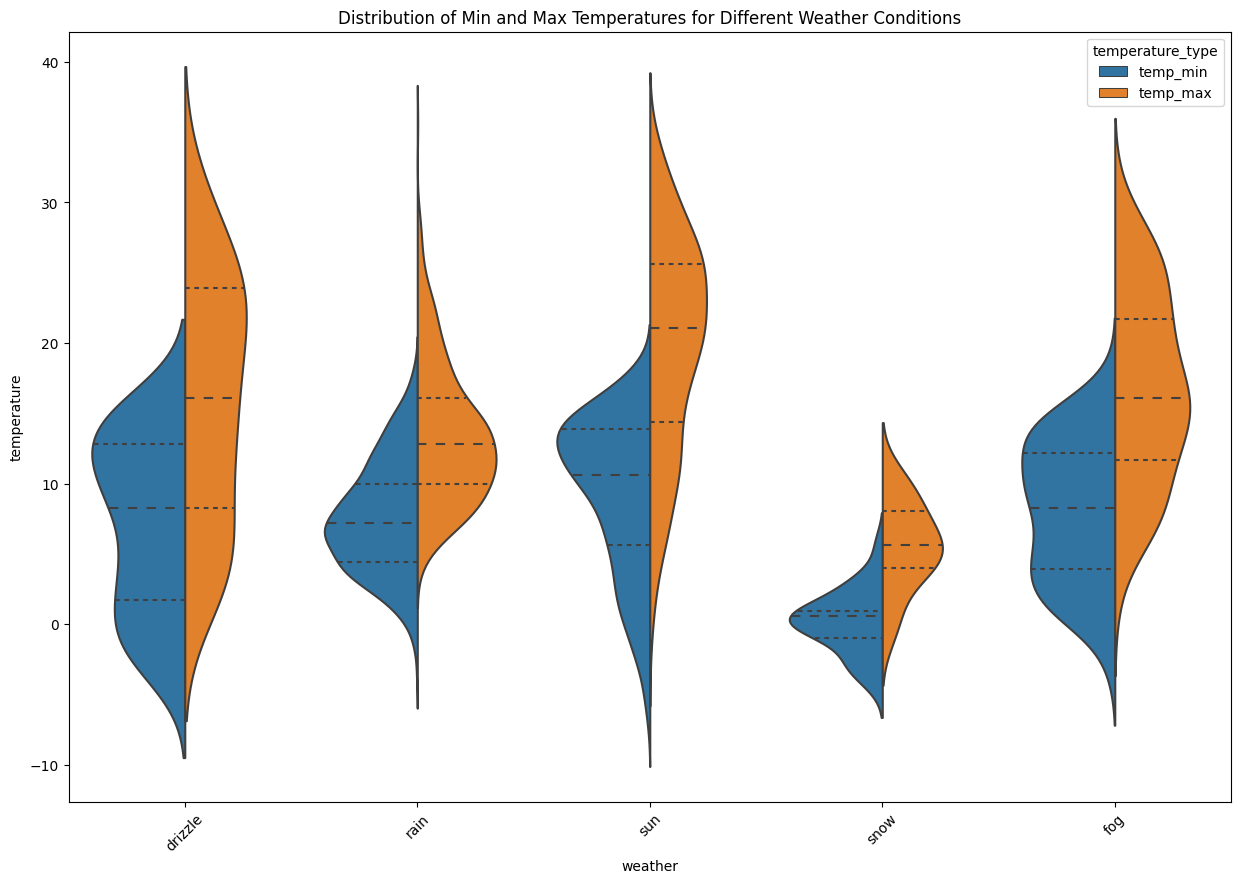

In [ ]:
# Melt the dataframe to have min and max temperatures in the same column
df_melted = pd.melt(df, id_vars='weather', value_vars=['temp_min', 'temp_max'], 
                    var_name='temperature_type', value_name='temperature')

# Plot violin chart
plt.figure(figsize=(15, 10))
sns.violinplot(x='weather', y='temperature', hue='temperature_type', data=df_melted, split=True, inner="quartile")
plt.title('Distribution of Min and Max Temperatures for Different Weather Conditions')
plt.xticks(rotation=45)
plt.show()


In [31]:
# Extract the month from the date column
df['month'] = pd.DatetimeIndex(df['date']).month

In [32]:
# create a crosstab between the 'month' and 'weather' columns
weather_month_crosstab = pd.crosstab(df['month'], df['weather'])


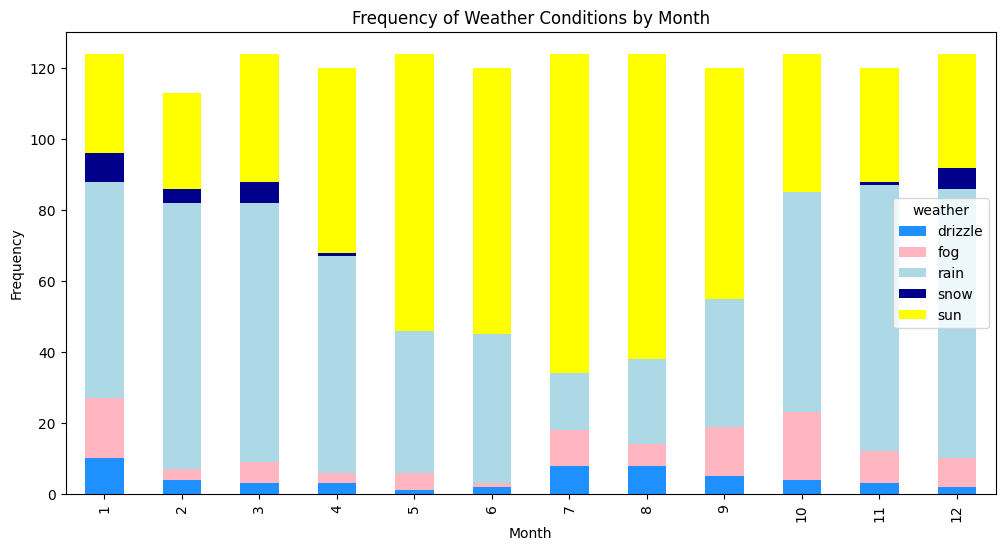

In [36]:
# Define a dictionary mapping weather conditions to colors
colors = {'sun': '#FFFF00', 'snow': '#00008B', 'rain': '#ADD8E6', 'fog': '#FFB6C1', 'drizzle': '#1E90FF'}

# Create a new dataframe with the frequency of each weather condition per month
weather_month_crosstab = pd.crosstab(df['month'], df['weather'])

# Plot the data
weather_month_crosstab.plot(kind='bar', stacked=True, 
                            color=[colors[weather] for weather in weather_month_crosstab.columns], 
                            figsize=(12, 6))

plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Frequency of Weather Conditions by Month')
plt.show()
